In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import warnings

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

warnings.filterwarnings("ignore")

In [2]:
sp = pd.read_csv("C:/Users/ozkan/datas/StudentsPerformance.csv")

In [3]:
df = sp.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Soru: 1 Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [10]:
variables = ["math score","reading score","writing score"]

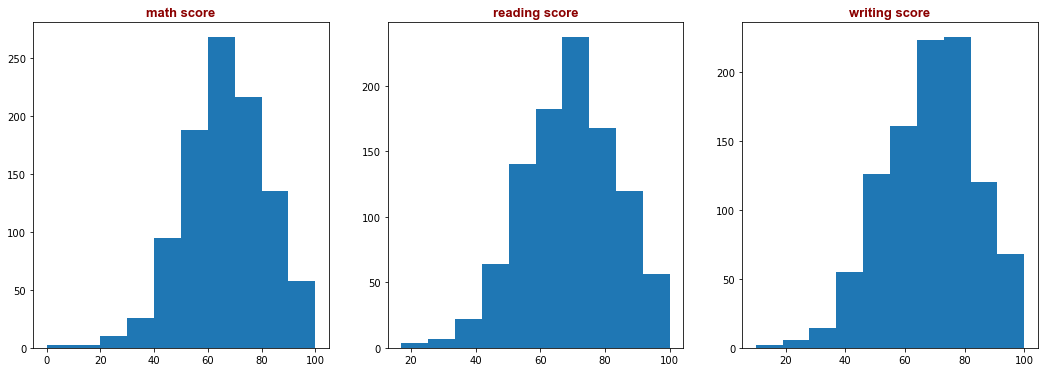

In [11]:
plt.figure(figsize=(18,6))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i], fontdict=baslik_font)

Sınavlar normal dağılımlı gözükmektedir fakat bu durumu istatistiksel oalrak inceleyebiliriz.

In [13]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = "{:.5f}".format

dagilim_testleri = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(df[variable]))
    norm_stats = normaltest(np.log(df[variable]))
    dagilim_testleri = dagilim_testleri.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,nan,nan,nan,nan
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


veriler normal dağılmamış

In [14]:
from sklearn.preprocessing import normalize

df["norm_math score"] = normalize(np.array(df["math score"]).reshape(1,-1)).reshape(-1,1)
df["norm_reading score"] = normalize(np.array(df["reading score"]).reshape(1,-1)).reshape(-1,1)
df["norm_writing score"] = normalize(np.array(df["writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["norm_math score","math score","norm_reading score","reading score",
                    "norm_writing score","writing score"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
norm_math score       0.00000
math score            0.00000
norm_reading score    0.00760
reading score        17.00000
norm_writing score    0.00454
writing score        10.00000
dtype: float64

Maksimum Değer
-----------------
norm_math score        0.04664
math score           100.00000
norm_reading score     0.04473
reading score        100.00000
norm_writing score     0.04535
writing score        100.00000
dtype: float64


Normalleştirdiğimiz değerleri grafik üzerinde görelim.

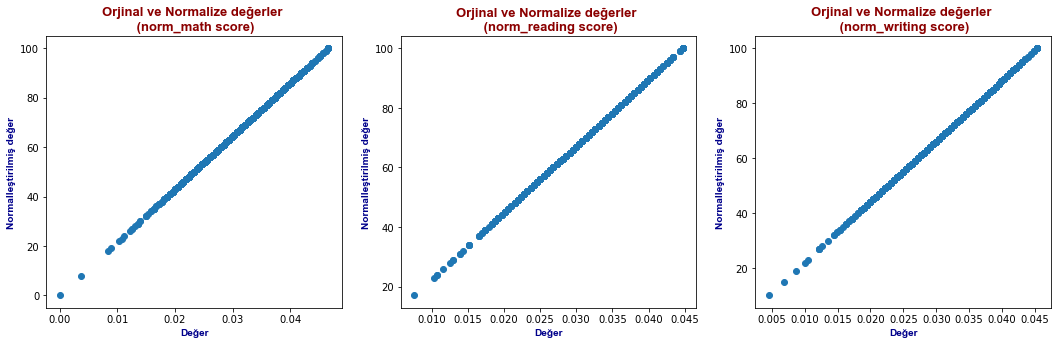

In [15]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[normal_ozellikler[2*i]], df[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş değer", fontdict=eksen_font)

plt.show()

# Soru: 2 Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [18]:
df["Ortalama_basari"] = ( df["math score"] + df["reading score"] + df["writing score"] ) / 3

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,norm_math score,norm_reading score,norm_writing score,Ortalama_basari
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356,72.66667
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991,82.33333
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995,49.33333
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401,76.33333


Text(0.5, 1.0, 'Ortalama_basari')

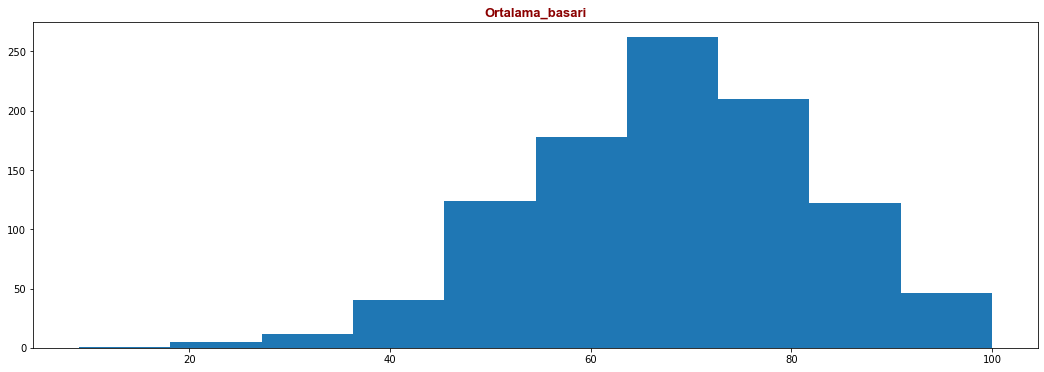

In [20]:
plt.figure(figsize=(18,6))

plt.hist(df["Ortalama_basari"])
plt.title("Ortalama_basari", fontdict=baslik_font)

In [22]:
pd.options.display.float_format = "{:.5f}".format

dagilim_testleri = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

jb_stats = jarque_bera(np.log(df["Ortalama_basari"]))
norm_stats = normaltest(np.log(df["Ortalama_basari"]))
dagilim_testleri = dagilim_testleri.append({"variable": "Ortalama_basari",
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,Ortalama_basari,2167.03935,0.00000,361.83694,0.00000


Normal dağılmamış.

In [23]:
from sklearn.preprocessing import normalize

df["norm_Ortalama_basari"] = normalize(np.array(df["Ortalama_basari"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["norm_Ortalama_basari","Ortalama_basari"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
norm_Ortalama_basari   0.00411
Ortalama_basari        9.00000
dtype: float64

Maksimum Değer
-----------------
norm_Ortalama_basari     0.04566
Ortalama_basari        100.00000
dtype: float64


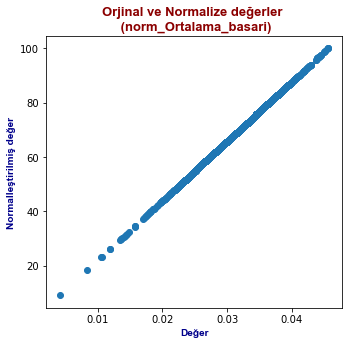

In [30]:
plt.figure(figsize=(18,5))

for i in range(1):
    plt.subplot(1,3,i+1)
    plt.scatter(df[normal_ozellikler[2*i]], df[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş değer", fontdict=eksen_font)

plt.show()

# Soru:3 Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

3 sınavın ortalamasını aldığımız için bu 3 sınavında oluşturduğum değişkeni etkilediğini düşünüyorum.